# Model Capstone Product Based CH2-PS081

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/drive/15ST_2Nmqlw3cw8U8Q_wHqPyaKd1YXTzq#scrollTo=J6Z17h4pO9VT"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/recommenders/blob/main/docs/examples/quickstart.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
</table>

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [ ]:
url = 'https://github.com/MITA-Team/Machine-Learning/raw/main/Datasets.csv'
data = pd.read_csv(url)
data.head(5)

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,Physical,Total,Age_Years,Sex,Jaundice,Family_mem_with_ASD,Who_completed_the_test,ASD_traits,Therapy,Percentage
0,1,0,0,0,0,0,0,1,1,0,...,2,3,2,1,1,0,0,0,9,[0:2:2:2]
1,2,1,1,0,0,0,1,1,0,0,...,1,4,3,0,1,0,0,1,5,[1:2:1:4]
2,3,1,0,0,0,0,0,1,1,0,...,2,4,3,0,1,0,0,1,8,[1:3:2:3]
3,4,1,1,1,1,1,1,1,1,1,...,3,10,2,0,0,0,0,1,4,[3:4:3:9]
4,5,1,1,0,1,1,1,1,1,1,...,3,9,2,1,0,1,0,1,8,[2:4:3:8]


# Model Klasifikasi ASD

In [ ]:
# Menginisialisasi data label dan input
X = data.drop(['Therapy', 'ASD_traits', 'Percentage', 'Case_No'], axis=1)
Y = data['ASD_traits']

In [ ]:
# Split data dengan Training data 80% dan validation data 20%
training_size= int(len(data)*0.8)

X_train = X[:training_size]
X_test = X[training_size:]
Y_train = Y[:training_size]
Y_test = Y[training_size:]

In [ ]:
model1 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history_classification=model1.fit(X_train, Y_train, epochs=50,validation_data=(X_test, Y_test))

Epoch 1/50
57/57 [==============================] - 2s 8ms/step - loss: 0.2401 - accuracy: 0.8841 - val_loss: 0.1322 - val_accuracy: 0.9557
Epoch 2/50
57/57 [==============================] - 0s 3ms/step - loss: 0.1178 - accuracy: 0.9573 - val_loss: 0.1105 - val_accuracy: 0.9645
Epoch 3/50
57/57 [==============================] - 0s 4ms/step - loss: 0.0904 - accuracy: 0.9712 - val_loss: 0.0860 - val_accuracy: 0.9800
Epoch 4/50
57/57 [==============================] - 0s 3ms/step - loss: 0.0683 - accuracy: 0.9800 - val_loss: 0.0746 - val_accuracy: 0.9823
Epoch 5/50
57/57 [==============================] - 0s 3ms/step - loss: 0.0560 - accuracy: 0.9845 - val_loss: 0.0725 - val_accuracy: 0.9823
Epoch 6/50
57/57 [==============================] - 0s 4ms/step - loss: 0.0458 - accuracy: 0.9878 - val_loss: 0.0560 - val_accuracy: 0.9889
Epoch 7/50
57/57 [==============================] - 0s 4ms/step - loss: 0.0354 - accuracy: 0.9928 - val_loss: 0.0460 - val_accuracy: 0.9956
Epoch 8/50
57/57 [==

Evaluasi model classification

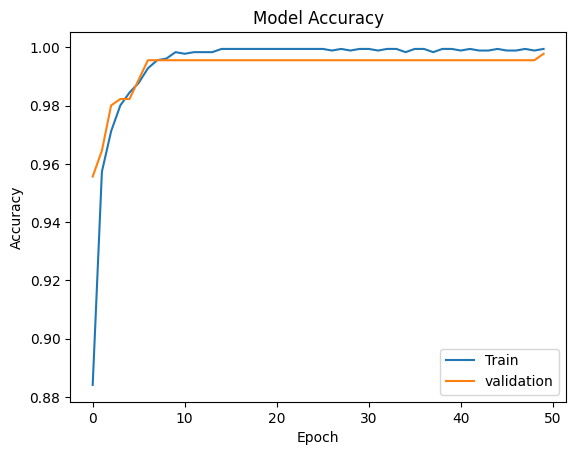

In [ ]:
plt.plot(history_classification.history['accuracy'])
plt.plot(history_classification.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel("Accuracy")
plt.xlabel('Epoch')
plt.legend(['Train', 'validation'])
plt.show()

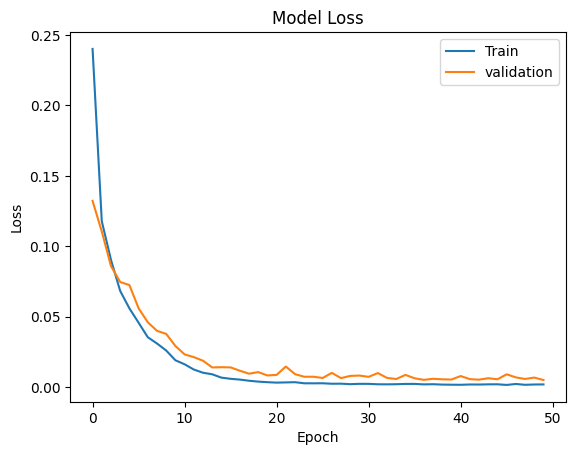

In [ ]:
plt.plot(history_classification.history['loss'])
plt.plot(history_classification.history['val_loss'])
plt.title('Model Loss')
plt.ylabel("Loss")
plt.xlabel('Epoch')
plt.legend(['Train', 'validation'])
plt.show()

# Model Rekomendasi

In [ ]:
# Menginisialisasi fitur dan label untuk sistem rekomendasi
label_encoder = LabelEncoder()
therapy = label_encoder.fit_transform(data['Therapy'])
features = data[['Speech', 'Sensory', 'Physical', 'Social', 'Total','ASD_traits']]

In [ ]:
# Split data training 80% dan testing 20%
x_train = features[:training_size]
x_test = features[training_size:]
y_train = therapy[:training_size]
y_test = therapy[training_size:]

# Normalize data
x_train_norm = ((x_train * x_train.mean())/x_train.std()).to_numpy()
x_test_norm = ((x_test * x_test.mean())/x_test.std()).to_numpy()

# One hot encoding labels
y_train_encoded = tf.keras.utils.to_categorical(y_train, num_classes=12)
y_test_encoded = tf.keras.utils.to_categorical(y_test, num_classes=12)

In [ ]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(128, input_shape=(6,), activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(12, activation='softmax')
])
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_reccomendations = model2.fit(x_train, y_train_encoded, epochs=50, batch_size=32, verbose=1, validation_data=(x_test,y_test_encoded))

Epoch 1/50
57/57 [==============================] - 4s 14ms/step - loss: 1.6560 - accuracy: 0.4063 - val_loss: 1.5459 - val_accuracy: 0.5344
Epoch 2/50
57/57 [==============================] - 0s 8ms/step - loss: 1.3588 - accuracy: 0.6535 - val_loss: 1.2484 - val_accuracy: 0.7871
Epoch 3/50
57/57 [==============================] - 0s 7ms/step - loss: 1.0313 - accuracy: 0.8004 - val_loss: 0.9266 - val_accuracy: 0.8071
Epoch 4/50
57/57 [==============================] - 0s 7ms/step - loss: 0.7544 - accuracy: 0.8548 - val_loss: 0.7577 - val_accuracy: 0.8647
Epoch 5/50
57/57 [==============================] - 1s 10ms/step - loss: 0.6216 - accuracy: 0.8764 - val_loss: 0.6329 - val_accuracy: 0.8603
Epoch 6/50
57/57 [==============================] - 0s 7ms/step - loss: 0.5460 - accuracy: 0.8886 - val_loss: 0.6121 - val_accuracy: 0.8803
Epoch 7/50
57/57 [==============================] - 0s 7ms/step - loss: 0.5006 - accuracy: 0.8980 - val_loss: 0.5652 - val_accuracy: 0.8780
Epoch 8/50
57/57 [

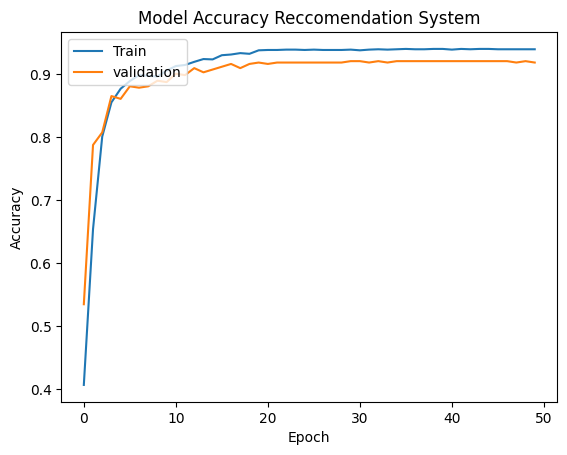

In [ ]:
plt.plot(history_reccomendations.history['accuracy'])
plt.plot(history_reccomendations.history['val_accuracy'])
plt.title('Model Accuracy Reccomendation System')
plt.ylabel("Accuracy")
plt.xlabel('Epoch')
plt.legend(['Train', 'validation'], loc='upper left')
plt.show()

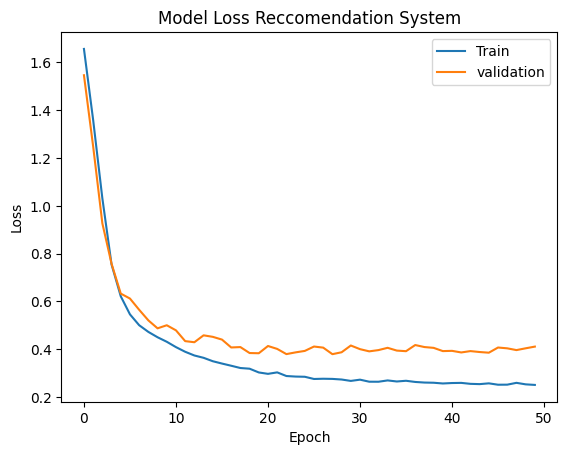

In [ ]:
plt.plot(history_reccomendations.history['loss'])
plt.plot(history_reccomendations.history['val_loss'])
plt.title('Model Loss Reccomendation System')
plt.ylabel("Loss")
plt.xlabel('Epoch')
plt.legend(['Train', 'validation'])
plt.show()

In [ ]:
# https://github.com/C23-PS475/Healcy_ML

# Prediksi model

Prediksi Klasifikasi

In [ ]:
# Input Time!
input_A1 = int(input('A1: '))
input_A2 = int(input('A2: '))
input_A3 = int(input('A3: '))
input_A4 = int(input('A4: '))
input_A5 = int(input('A5: '))
input_A6 = int(input('A6: '))
input_A7 = int(input('A7: '))
input_A8 = int(input('A8: '))
input_A9 = int(input('A9: '))
input_A10 = int(input('A10: '))
input_speech = input_A1 + input_A5 + input_A3
input_social = input_A1 + input_A2 + input_A3 + input_A4 + input_A6 + input_A7 + input_A9 + input_A10
input_sensory = input_A1 + input_A6 + input_A8 + input_A10
input_physical = input_A7 + input_A8 + input_A9
input_total = input_A1 + input_A2 + input_A3 + input_A4 + input_A5 + input_A6 + input_A7 + input_A8 + input_A9 + input_A10
input_Ages_Years = int(input('Age: '))
input_Sex = int(input('Sex: '))
input_Jaudience = int(input('Jaudience: '))
input_Family_mem_with_ASD = int(input('Family_mem_with_ASD: '))
input_Who_completed_the_test = int(input('Who_completed_the_test: '))


A1: 0
A2: 1
A3: 1
A4: 0
A5: 1
A6: 0
A7: 0
A8: 0
A9: 1
A10: 1
Age: 2
Sex: 0
Jaudience: 1
Family_mem_with_ASD: 1
Who_completed_the_test: 0


In [ ]:
user_input = pd.DataFrame([[input_A1, input_A2, input_A3, input_A4, input_A5,
                            input_A6, input_A7, input_A8, input_A9, input_A10,
                            input_speech, input_social, input_sensory, input_physical,
                            input_total, input_Ages_Years, input_Sex, input_Jaudience,
                            input_Family_mem_with_ASD, input_Who_completed_the_test]],
                          columns=['A1','A2','A3','A4','A5','A6','A7','A8', 'A9', 'A10',
                                   'Speech', 'Sensory', 'Physical', 'Social',
                                   'Total', 'Age_Years', 'Sex', 'Jaudience',
                                   'Family_mem_with_ASD', 'Who_completed_the_test'])

In [ ]:
# Membuat prediksi pada data uji
predictions = model1.predict(user_input)
# Mengevaluasi hasil prediksi (berdasarkan threshold 0.5)
predicted_labels = (predictions > 0.5).astype(int)
if predictions == 1:
  print(f'{predictions} Ada kemungkinan ASD')
else:
  print(f'{predictions} Tidak ada kemungkinan ASD')

1/1 [==============================] - 0s 94ms/step
[[0.9999933]] Tidak ada kemungkinan ASD


Melakukan prediksi untuk terapy

In [ ]:
# Memasukkan prediksi ASD ke dalam frame yang sama
# Untuk selanjutnya masuk ke rekomendasi terapi
user_input['ASD_traits'] = predicted_labels
user_input = user_input[['Speech', 'Sensory', 'Physical', 'Social', 'Total', 'ASD_traits']]


In [ ]:
predictions = model2.predict(user_input)
# Mengambil 5 hasil prediksi tertinggi
top_n = 3
top_indices = np.argsort(predictions[0])[::-1][:top_n]
top_probabilities = predictions[0][top_indices]

label_asli = {1:'Speech 1', 2:'Speech 2', 3: 'Speech 3', 4:'Social 1', 5:'Social 2', 6:'Social 3',
              7:'Sensory 1', 8:'Sensory 2', 9:'Sensory 3', 10:'Physical 1', 11:'Physical 2', 12:'Physical 3'}

# Menampilkan hasil prediksi dalam bentuk label asli
print(f"Top {top_n} Predicted Therapies (Original Labels):")
for label, prob in zip(top_indices, top_probabilities):
    original_label = label_asli[label]
    print(f"{original_label}: {prob:.4f}")

1/1 [==============================] - 0s 23ms/step
Top 3 Predicted Therapies (Original Labels):
Sensory 2: 0.9568
Sensory 1: 0.0432
Speech 2: 0.0000
